In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

%matplotlib inline

In [2]:
def plot_history(history, figsize=(12, 4), loss_train_key='loss', loss_val_key='val_loss', metric_train_key='accuracy', metric_val_key='val_accuracy'):
    loss_train = history.get(loss_train_key, [])
    loss_valid = history.get(loss_val_key, [])
    metric_train = history.get(metric_train_key, [])
    metric_valid = history.get(metric_val_key, [])

    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.plot(loss_train, label='train')
    plt.plot(loss_valid, label='val')
    plt.ylim(0)
    plt.legend()

    if len(metric_train) > 0 or len(metric_valid) > 0:
        plt.subplot(1, 2, 2)
        plt.plot(metric_train, label='train')
        plt.plot(metric_valid, label='val')
        plt.ylim(top=1)
        plt.legend()

In [3]:
url = "https://docs.google.com/spreadsheets/d/1ERrVusdxD4VXIQ-ZSPe1NXwEn_tZy_rlLH31w9dcRBE/edit#gid=52705794"
export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(export_url)
df = df[['user_id', 'content_id', 'game', 'view']]
df.head()

,user_id,content_id,game,view
0,0,226,Alien Swarm,1
1,0,846,Cities Skylines,1
2,0,972,Counter-Strike,1
3,0,978,Counter-Strike Source,1
4,0,1125,Day of Defeat,1


In [4]:
url = "https://docs.google.com/spreadsheets/d/16bJkUB1C60Z5jaXqGQhnzgpRxTqCWYk1_murLZiuOv4/edit#gid=1259582223"
export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')

df_game = pd.read_csv(export_url)
df_game.head()

,content_id,game,total_users,total_hours
0,0,007 Legends,1,1.7
1,1,0RBITALIS,3,4.2
2,2,1... 2... 3... KICK IT! (Drop That Beat Like a...,7,27.0
3,3,10 Second Ninja,6,11.9
4,4,"10,000,000",1,4.6


In [5]:
users_items_matrix_df = df.pivot(
    index='user_id',
    columns='content_id',
    values='view'
).fillna(0)

users_items_matrix_df.head()

content_id,0,1,2,3,4,5,6,7,8,9,...,5103,5104,5105,5106,5107,5108,5109,5110,5111,5112
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
users_items_matrix_df.shape

(3757, 5113)

# Model

In [7]:
x = users_items_matrix_df.values

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 enc_1 (Dense)               (None, 512)               2618368   
                                                                 
 embeddings (Dense)          (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dec_1 (Dense)               (None, 512)               131584    
                                                                 
 user_score_pred (Dense)     (None, 5113)              2622969   
                                                                 
Total params: 5,504,249
Trainable params: 5,504,249
Non-trainable params: 0
_________________________________________________________________


2023-07-06 09:59:13.586963: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-06 09:59:13.587092: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/arnaldo/Documents/autoencoders/.venv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50


2023-07-06 09:59:13.997895: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-06 09:59:14.399519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


53/53 [==============================] - 3s 31ms/step - loss: 0.0300 - val_loss: 0.0043
Epoch 2/50
 3/53 [>.............................] - ETA: 1s - loss: 0.0229

2023-07-06 09:59:16.506121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


53/53 [==============================] - 1s 26ms/step - loss: 0.0194 - val_loss: 0.0035
Epoch 3/50
53/53 [==============================] - 1s 26ms/step - loss: 0.0147 - val_loss: 0.0031
Epoch 4/50
53/53 [==============================] - 1s 23ms/step - loss: 0.0119 - val_loss: 0.0029
Epoch 5/50
53/53 [==============================] - 1s 22ms/step - loss: 0.0101 - val_loss: 0.0027
Epoch 6/50
53/53 [==============================] - 1s 23ms/step - loss: 0.0090 - val_loss: 0.0026
Epoch 7/50
53/53 [==============================] - 1s 22ms/step - loss: 0.0081 - val_loss: 0.0025
Epoch 8/50
53/53 [==============================] - 1s 22ms/step - loss: 0.0076 - val_loss: 0.0024
Epoch 9/50
53/53 [==============================] - 1s 22ms/step - loss: 0.0071 - val_loss: 0.0023
Epoch 10/50
53/53 [==============================] - 1s 22ms/step - loss: 0.0067 - val_loss: 0.0023
Epoch 11/50
53/53 [==============================] - 1s 22ms/step - loss: 0.0065 - val_loss: 0.0022
Epoch 12/50
53/53 [

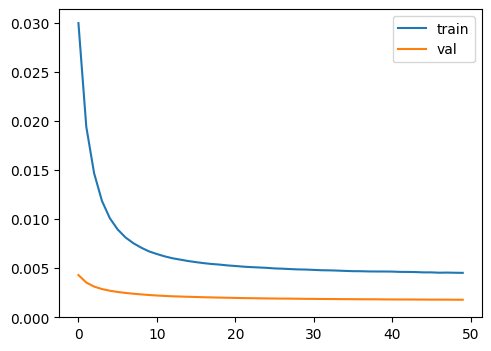

In [8]:
model = Sequential([
    Dense(units=512, activation='selu', name='enc_1', input_dim=users_items_matrix_df.shape[1]),
    Dense(units=256, activation='selu', name='embeddings'),
    Dropout(rate=0.8, name='dropout'),
    Dense(units=512, activation='selu', name='dec_1'),
    Dense(units=users_items_matrix_df.shape[1], activation='linear', name='user_score_pred')
])
model.summary()

model.compile(optimizer=Adam(lr=1e-4), loss='mse')

hist = model.fit(x, x, epochs=50, batch_size=64, shuffle=True, validation_split=0.1)
plot_history(hist.history)

In [9]:
new_matrix = model.predict(x) * (x == 0)

 18/118 [===>..........................] - ETA: 0s

2023-07-06 10:00:37.781485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 1s 6ms/step


In [10]:
new_users_items_matrix_df = pd.DataFrame(
    new_matrix,
    columns=users_items_matrix_df.columns,
    index=users_items_matrix_df.index
)
new_users_items_matrix_df.head()

content_id,0,1,2,3,4,5,6,7,8,9,...,5103,5104,5105,5106,5107,5108,5109,5110,5111,5112
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.003177,0.004170,-0.000295,0.011086,0.007769,0.002664,0.006555,-0.001422,-0.014202,-0.012049,...,-0.001049,0.001137,0.020472,-0.003754,-0.003389,-0.034300,-0.001435,-0.004423,-0.033939,-0.009173
1,0.013054,-0.006311,-0.005445,0.001293,0.013420,0.007349,0.003952,0.006787,0.006889,0.013171,...,0.010408,0.023391,-0.007960,0.006845,-0.000222,0.002145,0.007092,-0.005386,0.011377,0.012184
2,-0.003709,0.007673,-0.020596,-0.011850,-0.018888,-0.009197,0.014848,0.011987,0.010674,-0.018889,...,-0.025224,0.002882,0.013941,0.044933,0.003181,0.049383,-0.001339,0.022508,-0.011521,0.009307
3,0.001876,-0.001273,-0.003944,-0.002356,0.005061,0.001107,0.002456,0.001976,0.005738,0.002514,...,0.004504,0.009026,-0.001477,-0.001509,0.001635,-0.007358,0.003571,0.001707,-0.004625,-0.003640
4,0.003218,-0.003698,-0.006695,-0.004878,0.005303,0.003396,0.001191,0.008321,0.000786,0.006097,...,0.004555,0.009224,0.002615,-0.001516,0.000968,-0.009101,0.006379,0.001085,-0.000585,-0.001504


In [11]:
def recommender_for_user(user_id, interact_matrix, df_content, topn = 10):
    pred_scores = interact_matrix.loc[user_id].values

    df_scores = pd.DataFrame({
        'content_id': list(users_items_matrix_df.columns),
        'score': pred_scores
    })

    df_rec = (df_scores
        .set_index('content_id')
        .join(df_content.set_index('content_id'))
        .sort_values('score', ascending=False)
        .head(topn)[['score', 'game']]
    )

    return df_rec[df_rec.score > 0]

In [18]:
# user_id = 1011, 1319
random_idx = np.random.choice(df.user_id.values, size=1)[0]
random_idx = 1011
recommender_for_user(user_id=random_idx, interact_matrix=users_items_matrix_df, df_content=df_game)

,score,game
content_id,,
3196,1.0,Portal
4221,1.0,Team Fortress 2
2055,1.0,Half-Life 2
2058,1.0,Half-Life 2 Episode Two
2059,1.0,Half-Life 2 Lost Coast
2057,1.0,Half-Life 2 Episode One


In [19]:
recommender_for_user(user_id=random_idx, interact_matrix=new_users_items_matrix_df, df_content=df_game)

,score,game
content_id,,
2056,0.321921,Half-Life 2 Deathmatch
978,0.215626,Counter-Strike Source
2062,0.191116,Half-Life Deathmatch Source
3197,0.187599,Portal 2
2457,0.139490,Left 4 Dead 2
1126,0.111168,Day of Defeat Source
2064,0.099640,Half-Life Source
2456,0.094903,Left 4 Dead
226,0.075590,Alien Swarm


# Referências

- [Deep Learning para Sistemas de Recomendação (Parte 2) — Filtragem Colaborativa com AutoEncoders](https://medium.com/data-hackers/deep-learning-para-sistemas-de-recomendação-parte-2-filtragem-colaborativa-com-autoencoders-347ba7d53bae#:~:text=Um%20Autoencoder%20(AE)%20é%20uma,%2C%20f(x)%3Dh.)